# Aztec G-dDT Test Run

In [1]:
import sys
sys.path.append('../')

import pandas as pd
import os
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = "png"

In [2]:
from aztec_gddt.experiment import test_run

sim_df = test_run()
sim_df.columns

Index(['index', 'l1_blocks_passed', 'delta_l1_blocks', 'agents',
       'validator_set', 'PROVING_COST_MODIFIER', 'current_epoch', 'last_epoch',
       'last_reward_time_in_l1', 'last_reward', 'simulation', 'subset', 'run',
       'timestep', 'label', 'timestep_in_l1_blocks', 'general', 'fee',
       'reward', 'stake', 'slash', 'behavior'],
      dtype='object')

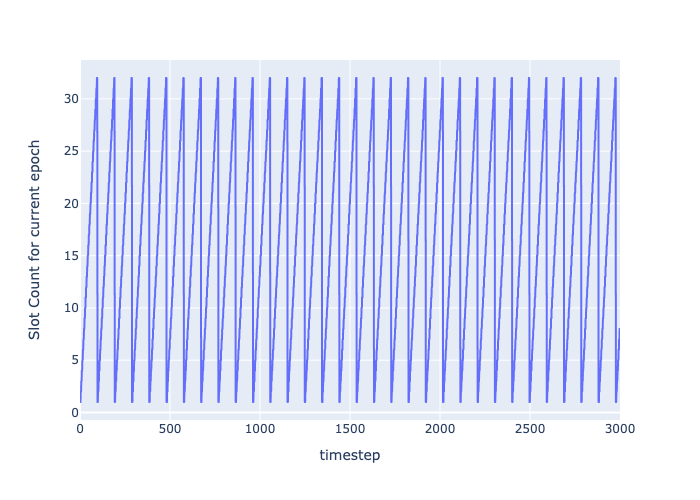

In [3]:
x= sim_df.timestep
y = sim_df.current_epoch.map(lambda x: len(x.slots))

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Slot Count for current epoch'})
fig.show()

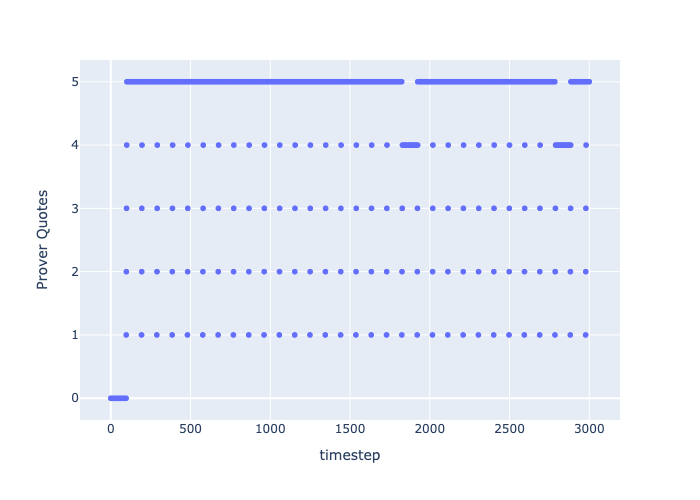

In [4]:
x= sim_df.timestep
y = sim_df.last_epoch.map(lambda x: len(x.prover_quotes))

fig = px.scatter(x=x, y=y, labels={"x": 'timestep', 'y': 'Prover Quotes'})
fig.show()

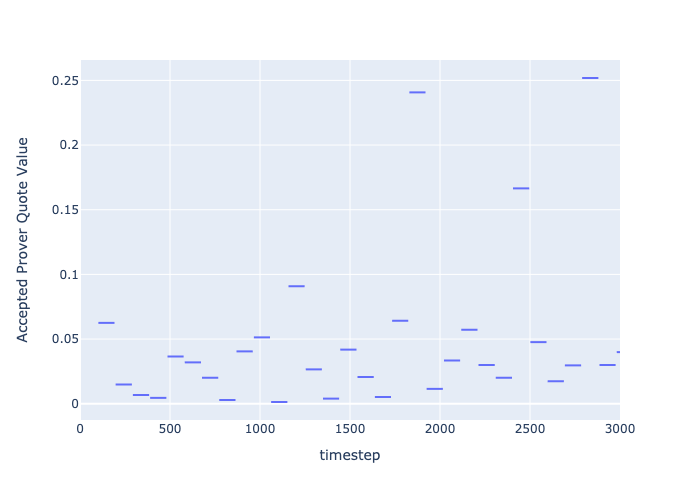

In [5]:
x= sim_df.timestep
y = sim_df.last_epoch.map(lambda x: x.accepted_prover_quote)

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Accepted Prover Quote Value'})
fig.show()

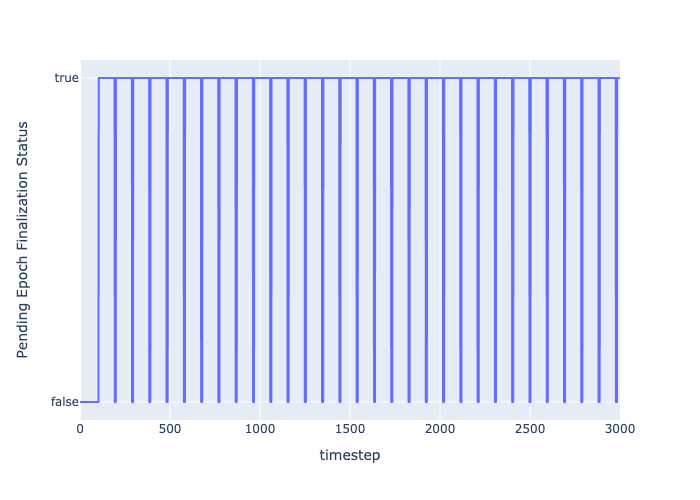

In [6]:
x= sim_df.timestep
y = sim_df.last_epoch.map(lambda x: x.finalized)

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Pending Epoch Finalization Status'})
fig.show()

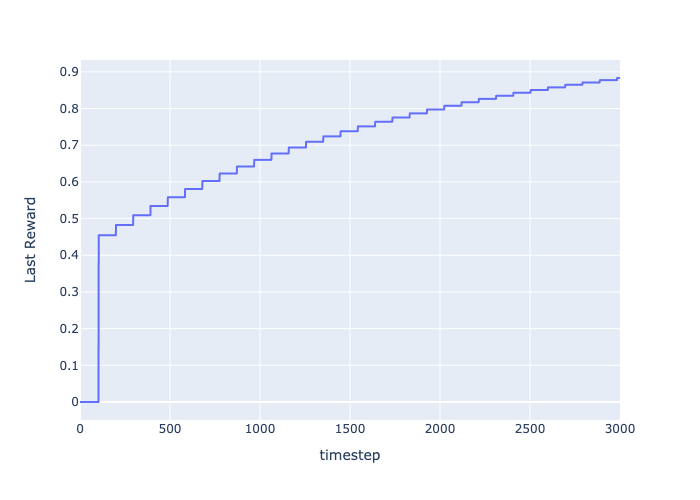

In [7]:
x= sim_df.timestep
y = sim_df.last_reward

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Last Reward'})
fig.show()

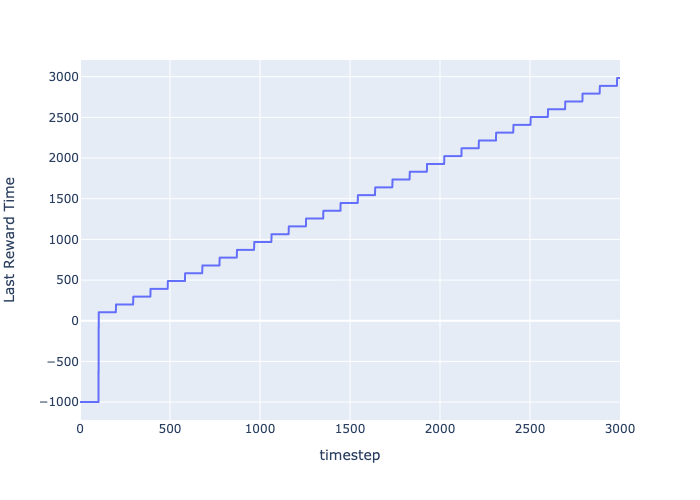

In [8]:
x= sim_df.timestep
y = sim_df.last_reward_time_in_l1

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Last Reward Time'})
fig.show()

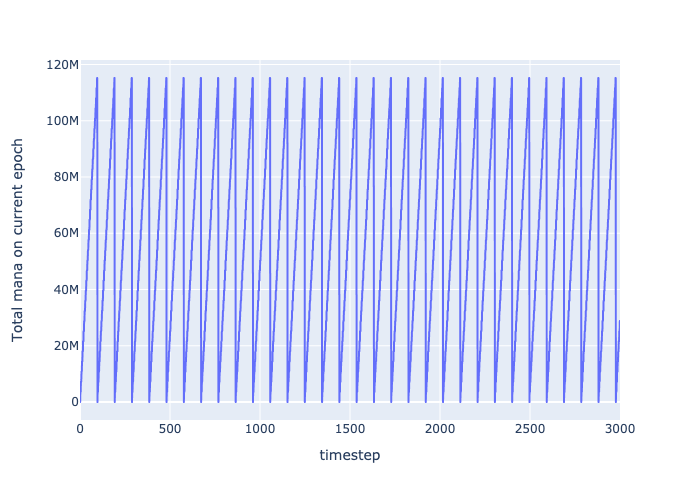

In [17]:
x= sim_df.timestep
y = sim_df.current_epoch.map(lambda x: sum(s.tx_total_mana for s in x.slots))

fig = px.line(x=x, y=y, labels={"x": 'timestep', 'y': 'Total mana on current epoch'})
fig.show()